## Lab 2 Question 4

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Now let us consider the stimulation happened 3 times. Reuse the code in question 1 from lab 1 and create an impulse response which is 40 seconds long of amplitude 2 at time = 4,
then another of amplitude 1 at time = 10, and another of amplitude 3 at time = 20. This will be used as the input neural signal. 

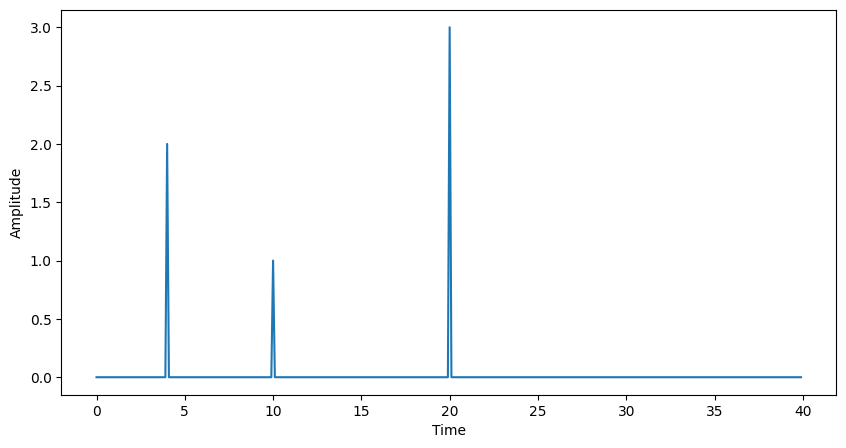

In [9]:
time_max = 40
time_points = np.arange(0, time_max, 0.1)
number_of_time_points = len(time_points)

impulses = np.zeros(number_of_time_points)
impulses[40] = 2
impulses[100] = 1
impulses[200] = 3

plt.figure(figsize=(10, 5))
plt.plot(time_points, impulses)
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.show()

Hemodynamic response
Estimate of the hemodynamic response to a very brief stimulus:


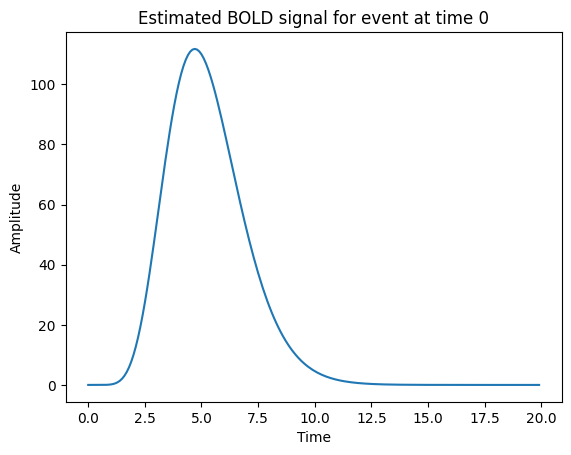

In [11]:
def hemodynamic_response_function(t):
	return (t ** 8.6) * np.exp(-t / 0.547)

hrf_time_points = np.arange(0, 20, 0.1)
number_of_hrf_time_points = len(hrf_time_points)
hrf_signal = hemodynamic_response_function(hrf_time_points)

plt.plot(hrf_time_points, hrf_signal)
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.title("Estimated BOLD signal for event at time 0")
plt.show()

Building the hemodynamic output from the neural input
Shift the HRF signal over the input signal for convolution.

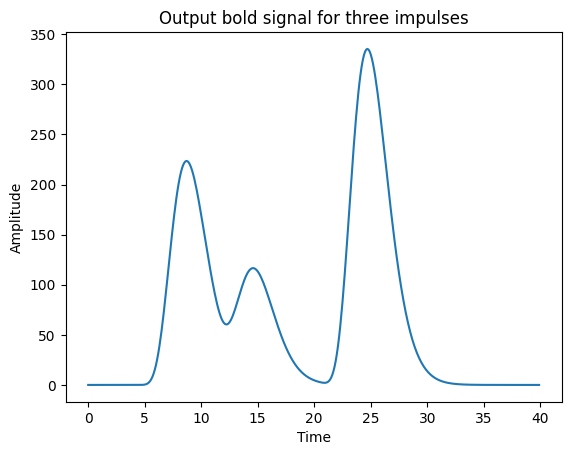

In [14]:
bold_signal = np.zeros(number_of_time_points)

# bold_signal[time:time + number_of_hrf_time_points] = hrf_signal * amplitude
# * 10 because time_points are in 0.1s
bold_signal[4 * 10:4 * 10 + number_of_hrf_time_points] = hrf_signal * 2
bold_signal[10 * 10:10 * 10 + number_of_hrf_time_points] += hrf_signal * 1
bold_signal[20 * 10:20 * 10 + number_of_hrf_time_points] += hrf_signal * 3

plt.plot(time_points, bold_signal)
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.title("Output bold signal for three impulses")
plt.show()


Create an algorithm for general case
Now we have a general algorithm for making our output hemodynamic signal from our input neural signal:
1. Start with an output vector, i.e., a vector of zeros
2. For each index 𝑖 in the input vector (the neural signal), prepare a shifted copy of the
HRF vector, starting at 𝑖. Call this the shifted HRF vector
3. Multiply the shifted HRF vector by the value in the input at index 𝑖, to give the
shifted scaled HRF vector.
4. Add the shifted scaled HRF vector to the output.


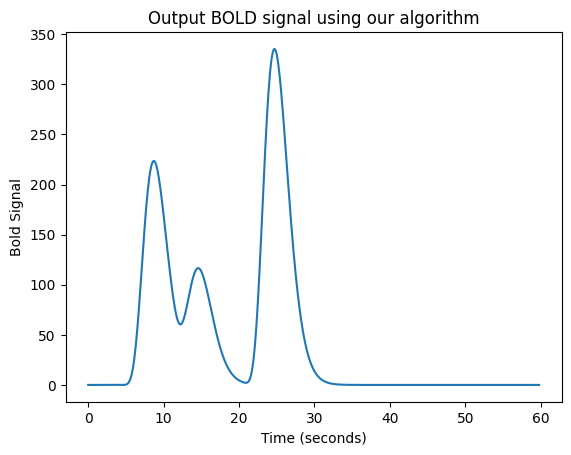

In [15]:
bold_signal = np.zeros(number_of_time_points + number_of_hrf_time_points - 1)

for i in range(number_of_time_points):
	bold_signal[i:i + number_of_hrf_time_points] += hrf_signal * impulses[i]
 
extra_times = np.arange(number_of_hrf_time_points - 1) * 0.1 + 40
times_and_tail = np.concatenate((time_points, extra_times))

plt.plot(times_and_tail, bold_signal)
plt.xlabel('Time (seconds)')
plt.ylabel('Bold Signal')
plt.title('Output BOLD signal using our algorithm')
plt.show()

Numpy convolve

Text(0.5, 1.0, 'Output BOLD signal using numpy')

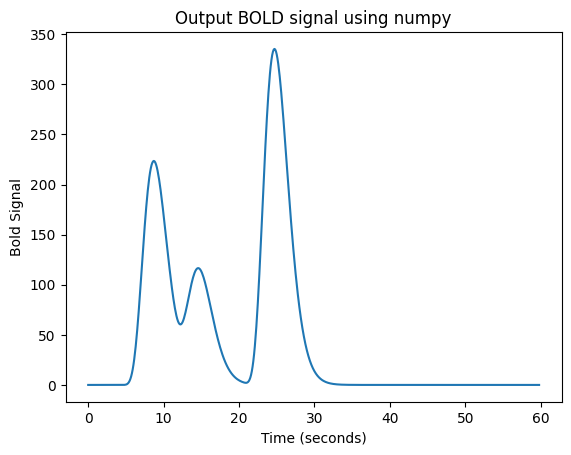

In [16]:
bold_signal = np.convolve(impulses, hrf_signal)

plt.plot(times_and_tail, bold_signal)
plt.xlabel('Time (seconds)')
plt.ylabel('Bold Signal')
plt.title('Output BOLD signal using numpy')